There are $i$ usines, which one with capacity $G_i$. The sum of the capacities of the working usines is the capacity available of the month. Given the capacities of the usines, how to maximize the minimal capacity available in a year?

In [1]:
using JuMP, GLPKMathProgInterface, DataFrames, Cbc, Plots, StatPlots

In [29]:
G = [10, 5, 20, 18, 23, 32, 7, 12, 10, 20, 17, 32, 12, 13, 7];

In [30]:
m = Model(solver = CbcSolver())

@variable(m, x[1:15, 1:12], Bin)
@variable(m, α)

@constraintref constraints1[1:15]
for plant in eachindex(constraints1)
    constraints1[plant] = @constraint(m, sum(x[plant, 1:12]) >= 1)
end

@constraintref constraints2[1:12]
for month in eachindex(constraints2)
    constraints2[month] = @constraint(m, α <= sum(G .* (1 .- x[1:15, month])))
end

@objective(m, Max, α);

In [31]:
solve(m)
@show getvalue(α)
schedule_matrix = getvalue(x)

getvalue(α) = 206.0


15×12 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [32]:
schedule1 = DataFrame(months = collect(1:12), plants = [[] for i in 1:12], capacity_available = [sum(G) for i in 1:12]);

In [33]:
for plant in 1:15
    for month in 1:12
        if schedule_matrix[plant, month] == 1
            push!(schedule1.plants[month], plant)
            schedule1.capacity_available[month] -= G[plant]
        end
    end
end
schedule1

,months,plants,capacity_available
,Int64,Array…,Int64
1,1,"[3, 8]",206
2,2,"[1, 9]",218
3,3,"[7, 10]",211
4,4,[5],215
5,5,[11],221
6,6,[6],206
7,7,[12],206
8,8,"[13, 14]",213
9,9,[4],220


Now, let's consider the power demand of the month: capacity available always has to be bigger than the demand. Thus, let's minimize the bigger difference between capacity available and demand.

In [34]:
G2 = [10, 5, 20, 18, 23, 32, 7, 12, 10, 20, 17, 32, 12, 13, 7]
d = [238, 220, 187, 175, 135, 127, 144, 165, 193, 205, 213, 233]
nmonths = length(d)
nplants = length(G2);

In [35]:
n = Model(solver = CbcSolver())

@variable(n, y[1:nplants, 1:nmonths], Bin)
@variable(n, β)

@constraintref constraints3[1:nplants]
for plant in eachindex(constraints3)
    constraints3[plant] = @constraint(n, sum(y[plant, 1:nmonths]) >= 1)
end

@constraintref constraints4[1:nmonths]
for month in eachindex(constraints4)
    constraints4[month] = @constraint(n, 0 <= sum(G2 .* (1 .- y[1:nplants, month])) - d[month])
end

@constraintref constraints5[1:nmonths]
for month in eachindex(constraints5)
    constraints5[month] = @constraint(n, sum(G2 .* (1 .- y[1:nplants, month])) - d[month] <= β)
end

@objective(n, Min, β);

In [36]:
solve(n)
@show getvalue(β)
schedule_matrix2 = getvalue(y)

getvalue(β) = 0.0


15×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

In [59]:
schedule2 = DataFrame(months = collect(1:12), demand = d, plants = [[] for i in 1:12], capacity_available = [sum(G2) for i in 1:12]);

In [60]:
for plant in 1:15
    for month in 1:12
        if schedule_matrix2[plant, month] == 1
            push!(schedule2.plants[month], plant)
            schedule2.capacity_available[month] -= G2[plant]
        end
    end
end
schedule2

,months,demand,plants,capacity_available
,Int64,Int64,Array…,Int64
1,1,238,[],238
2,2,220,[2],233
3,3,187,"[3, 4]",200
4,4,175,"[11, 12]",189
5,5,135,"[2, 3, 6, 12]",149
6,6,127,"[1, 6, 9, 10, 12]",134
7,7,144,"[2, 4, 9, 11, 12, 13]",144
8,8,165,"[1, 5, 9, 11]",178
9,9,193,"[8, 10]",206


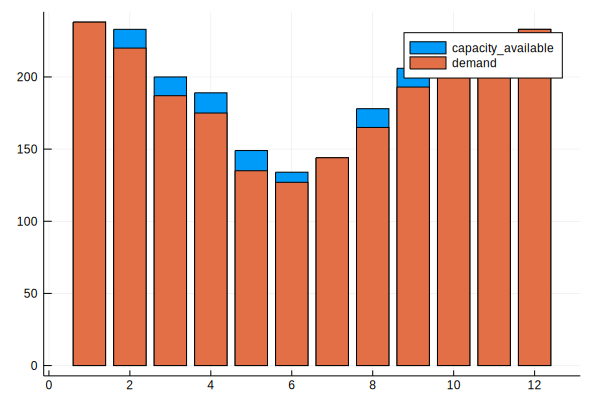

In [61]:
groupedbar([schedule2.capacity_available d], label = "capacity_available")
bar!(d, label = "demand")

Now let's consider a margin of 10% of the demands, a tolerance δ below that and costs: cost of the energy and cost of the tolerance δ. We will try to mininize the total cost.

In [91]:
C_δ = 2
C_α = 1
G3 = [10, 5, 20, 18, 23, 32, 7, 12]
d3 = [20, 15, 10, 15, 17];
G2 = [10, 5, 20, 18, 23, 32, 7, 12, 10, 20, 17, 32, 12, 13, 7]
d = [238, 220, 187, 175, 135, 127, 144, 165, 193, 205, 213, 233];

In [92]:
o = Model(solver = CbcSolver())

nmonths3 = length(d3)
nplants3 = length(G3)

@variable(o, x[1:nplants3, 1:nmonths3], Bin)
@variable(o, α)
@variable(o, δ)

@constraintref constraints1[1:nplants3]
for plant in eachindex(constraints1)
    constraints1[plant] = @constraint(o, sum(x[plant, 1:nmonths3]) >= 1)
end

@constraintref constraints2[1:nmonths3]
for month in eachindex(constraints2)
    constraints2[month] = @constraint(o, δ + sum(G3 .* (1 .- x[1:nplants3, month])) >= 1.1 * d3[month])
end

@constraintref constraints3[1:nmonths3]
for month in eachindex(constraints3)
    constraints3[month] = @constraint(o, α >= sum(G3 .* (1 .- x[1:nplants3, month])) - 1.1 * d3[month])
end

@constraint(o, δ >= 0)

@objective(o, Min, C_δ * δ + C_α * α);

In [93]:
solve(o)
@show getvalue(α)
@show getvalue(δ)
schedule_matrix3 = getvalue(x)

getvalue(α) = 0.9999999999999878
getvalue(δ) = 0.0


8×5 Array{Float64,2}:
 0.0  0.0  1.0  0.0  1.0
 0.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 0.0  0.0  1.0  0.0  0.0
 1.0  1.0  0.0  1.0  0.0

In [94]:
schedule3 = DataFrame(months = collect(1:nmonths3), demand = d3, plants = [[] for i in 1:nmonths3], capacity_available = [sum(G3) for i in 1:nmonths3]);

In [95]:
for plant in 1:nplants3
    for month in 1:nmonths3
        if schedule_matrix3[plant, month] == 1
            push!(schedule3.plants[month], plant)
            schedule3.capacity_available[month] -= G3[plant]
        end
    end
end
schedule3

,months,demand,plants,capacity_available
,Int64,Int64,Array…,Int64
1,1,20,"[3, 4, 5, 6, 8]",22
2,2,15,"[2, 3, 4, 5, 6, 8]",17
3,3,10,"[1, 2, 3, 4, 5, 6, 7]",12
4,4,15,"[2, 3, 4, 5, 6, 8]",17
5,5,17,"[1, 2, 3, 4, 5, 6]",19


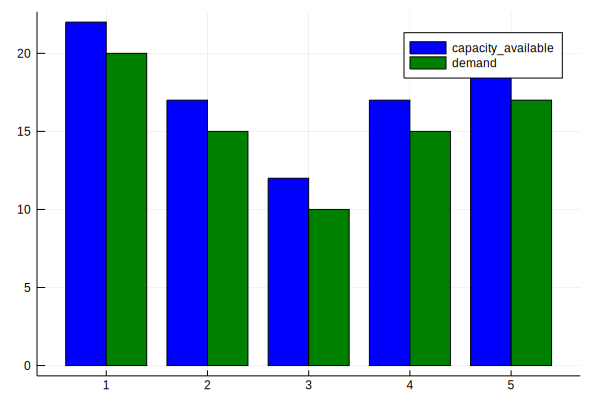

In [98]:
groupedbar([schedule3.capacity_available d3], label = ["capacity_available", "demand"], colour = [:blue :green])

Now let's try something more ambicious: optimize month by month. In the same way.

In [29]:
C_δ4 = 1.1
C_α4 = 1
G4 = [10, 5, 20, 18, 23, 32, 7, 12, 10, 20, 17, 32, 12, 13, 7]
d4 = [238, 220, 187, 175, 135, 127, 144, 165, 193, 205, 213, 233];

In [30]:
p = Model(solver = CbcSolver())

nmonths4 = length(d4)
nplants4 = length(G4)

@variable(p, x[1:nplants4, 1:nmonths4], Bin)
@variable(p, α[1:nmonths4])
@variable(p, δ[1:nmonths4])

#Every plant has to be turned off in some month
@constraintref constraints1[1:nplants4]
for plant in eachindex(constraints1)
    constraints1[plant] = @constraint(p, sum(x[plant, 1:nmonths4]) >= 1)
end

@constraintref constraints2[1:nmonths4]
for month in eachindex(constraints2)
    constraints2[month] = @constraint(p, δ[month] + sum(G4 .* (1 .- x[1:nplants4, month])) >= 1.1 * d4[month])
end

@constraintref constraints3[1:nmonths4]
for month in eachindex(constraints3)
    constraints3[month] = @constraint(p, α[month] >= sum(G4 .* (1 .- x[1:nplants4, month])) - 1.1 * d4[month])
end

@constraint(p, α .>= 0)
@constraint(p, δ .>= 0)

@objective(p, Min, C_δ4 * sum(δ) + C_α4 * sum(α));

In [ ]:
solve(p)
@show getvalue(α)
@show getvalue(δ)
schedule_matrix4 = getvalue(x)

In [ ]:
schedule4 = DataFrame(months = collect(1:nmonths4), demand = d4, plants = [[] for i in 1:nmonths4], capacity_available = [sum(G4) for i in 1:nmonths4]);

In [ ]:
for plant in 1:nplants4
    for month in 1:nmonths4
        if schedule_matrix4[plant, month] == 1
            push!(schedule4.plants[month], plant)
            schedule4.capacity_available[month] -= G4[plant]
        end
    end
end
schedule4

In [ ]:
groupedbar([schedule4.capacity_available d4], label = ["capacity_available", "demand"], colour = [:blue :green])